In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
image_data = pd.read_csv('imgs_data.csv')

### 读取文件

In [5]:
image_data.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,cluster_centers_rgb,color_ratios_raw,cluster_centers_hsv,matched_colors_raw,matched_colors,color_ratios_matched,filename,...,red_ratio,orange_ratio,yellow_ratio,cyan_ratio,blue_ratio,purple_ratio,black_ratio,white_ratio,gray_ratio,color_number
0,0,0,0,[[153 160 165]\n [ 22 80 129]\n [127 123 111]...,[0.34035833 0.03794167 0.32735833 0.1571 0...,"[array([103, 19, 165], dtype=uint8), array([1...","['gray', 'cyan', 'orange', 'gray', 'yellow']","['gray', 'cyan', 'orange', 'yellow']","[np.float64(0.49745833333333334), np.float64(0...",51415142fdc9f04926007f43.jpg,...,0.0,0.327358,0.137242,0.037942,0.0,0.0,0.0,0.000000,0.497458,4
1,1,1,1,[[ 36 35 26]\n [171 174 177]\n [ 93 96 66]...,[0.27780833 0.1731 0.21171667 0.1403 0...,"[array([27, 71, 36], dtype=uint8), array([105,...","['yellow', 'gray', 'yellow', 'orange', 'yellow']","['yellow', 'gray', 'orange']","[np.float64(0.6866), np.float64(0.1731), np.fl...",50f5ed9afdc9f065f0008e32.jpg,...,0.0,0.140300,0.686600,0.000000,0.0,0.0,0.0,0.000000,0.173100,3
2,2,2,2,[[153 148 121]\n [ 53 54 32]\n [214 215 209]...,[0.202775 0.20121667 0.1415 0.24424167 0...,"[array([ 25, 53, 153], dtype=uint8), array([ ...","['yellow', 'yellow', 'white', 'cyan', 'yellow']","['yellow', 'white', 'cyan']","[np.float64(0.6142583333333334), np.float64(0....",513e6050fdc9f0358700b395.jpg,...,0.0,0.000000,0.614258,0.244242,0.0,0.0,0.0,0.141500,0.000000,3
3,3,3,3,[[ 68 72 69]\n [204 205 204]\n [157 159 158]...,[0.24099167 0.27510833 0.28238333 0.09298333 0...,"[array([68, 14, 72], dtype=uint8), array([ 60,...","['gray', 'white', 'gray', 'gray', 'yellow']","['gray', 'white', 'yellow']","[np.float64(0.6163583333333332), np.float64(0....",50f5eb28fdc9f065f0008096.jpg,...,0.0,0.000000,0.108533,0.000000,0.0,0.0,0.0,0.275108,0.616358,3
4,4,4,4,[[ 52 54 33]\n [143 140 133]\n [203 205 204]...,[0.23179167 0.2211 0.0928 0.12643333 0...,"[array([33, 99, 54], dtype=uint8), array([ 21,...","['yellow', 'gray', 'white', 'gray', 'gray']","['yellow', 'gray', 'white']","[np.float64(0.23179166666666667), np.float64(0...",50f5ec32fdc9f065f00087a7.jpg,...,0.0,0.000000,0.231792,0.000000,0.0,0.0,0.0,0.092800,0.675408,3


#### 检查数据类型

In [6]:
image_data['matched_colors'].apply(lambda x: type(x)).value_counts()

matched_colors
<class 'str'>    110647
Name: count, dtype: int64

In [7]:
image_data['h_std'].apply(lambda x: type(x)).value_counts()

h_std
<class 'float'>    110647
Name: count, dtype: int64

In [8]:
image_data['color_ratios_matched'].apply(lambda x: type(x)).value_counts()

color_ratios_matched
<class 'str'>    110647
Name: count, dtype: int64

In [9]:
type(image_data['color_ratios_matched'].iloc[0])

str

In [10]:
image_data['color_ratios_matched'].iloc[0]

'[np.float64(0.49745833333333334), np.float64(0.037941666666666665), np.float64(0.3273583333333333), np.float64(0.13724166666666668)]'

#### 更正数据类型

In [11]:
# str -> list

import ast
# ast（抽象语法树）： ast 是 Python 标准库中非常有用的一个模块，尤其在解析、分析、或者安全地执行字符串表达的 Python 对象时非常关键。

def ensure_list(x): # 该函数接受一个参数 x，其目的是确保输入的 x 最终以列表的形式返回
    if isinstance(x,list):
        return x
    elif isinstance(x,str):
        try: # 开始一个 try-except 异常处理块，用于尝试执行可能会引发异常的代码
            return ast.literal_eval(x)
            # 尝试使用 ast.literal_eval 函数将字符串 x 转换为 Python 对象。如果 x 是一个合法的 Python 列表字面量字符串（例如 "[1, 2, 3]"），则将其转换为列表并返回
        except Exception: # 当 ast.literal_eval(x) 执行过程中出现任何异常（例如 x 不是合法的 Python 列表字面量字符串）时，会捕获该异常
            return [] # 如果在转换过程中出现异常，返回一个空列表
    return [] # 如果 x 既不是列表也不是字符串，或者在字符串转换过程中出现异常，最终返回一个空列表

# isinstance(x, list), 是一个 Python 内置函数，用来判断一个变量 x 的类型是不是 list（列表）， 
# 以换成任何 Python 类型名或类型组合，比如 str、int、dict、tuple、float、np.ndarray、pd.DataFrame

# ast.literal_eval() 是 Python 内置模块 ast（抽象语法树）中的一个函数，用来安全地将字符串解析为 Python 对象。
# 但只能解析“字面量表达式”，也就是只允许：字符串表示的列表、字典、数字、字符串等,不允许函数调用、类实例、变量名（所以比 eval() 安全）

In [12]:
image_data['matched_colors'] = image_data['matched_colors'].apply(ensure_list)
image_data['matched_colors_raw'] = image_data['matched_colors_raw'].apply(ensure_list)

In [13]:
# str -> np array list

def safe_eval_np_list(s):
    if isinstance(s,list):
        return s
    if isinstance(s,str):
        try:
            return eval(s,{'np':np})
            # eval 函数的第二个参数是一个字典，用于指定全局命名空间。在这个例子中，{'np': np} 表示将 np 作为一个全局名称，其值为 numpy 模块。
            # 这意味着在字符串 s 中可以使用 np 来引用 numpy 模块，例如 np.array([1, 2, 3])
        except Exception as e:
            print('解析失败:',s)
            print('错误信息:',e)
            return []
    return []

# eval() 是 Python 的内置函数，用来执行字符串形式的 Python 表达式，并返回结果。
# eval(expression, globals=None, locals=None)
# expression: 要执行的字符串，比如 "1 + 2" 或 "np.float64(0.5)"
# globals: 可选，全局变量作用域（如你传入的 {"np": np}）
# locals: 可选，局部变量作用域

In [14]:
image_data['color_ratios_matched'] = image_data['color_ratios_matched'].apply(safe_eval_np_list)

In [15]:
image_data['color_ratios_matched'].apply(lambda x: type(x)).value_counts()

color_ratios_matched
<class 'list'>    110647
Name: count, dtype: int64

### 计算颜色概率

In [16]:
# 检查不一致行数
mismatch = image_data.apply(lambda row: len(ensure_list(row['matched_colors'])) != len(ensure_list(row['color_ratios_matched'])),axis=1)

print("总行数:", len(image_data))
print("不一致行数:", mismatch.sum())

总行数: 110647
不一致行数: 0


In [17]:
# 绿色的概率
green_ratios = []
for _, row in image_data.iterrows():
    colors = row['matched_colors']
    ratios = row['color_ratios_matched']

    if 'green' in colors:
        green_index = colors.index('green') # index() 是 Python 列表对象的一个方法，它接受一个参数，即要查找的元素，然后返回该元素在列表中第一次出现的索引
        green_ratios.append(ratios[green_index])
    else:
        green_ratios.append(0.0)

image_data['green_ratio'] = green_ratios


In [18]:
image_data['green_ratio'].unique()

array([0.        , 0.14309167, 0.16288333, ..., 0.25951667, 0.18770833,
       0.09668333])

In [19]:
image_data_green = image_data[image_data['green_ratio'] != 0 ]
print(len(image_data_green))

51514


截距: 995.750281111487
绿色比例的回归系数: 36.087824980927465
R²: 0.014383017267738274


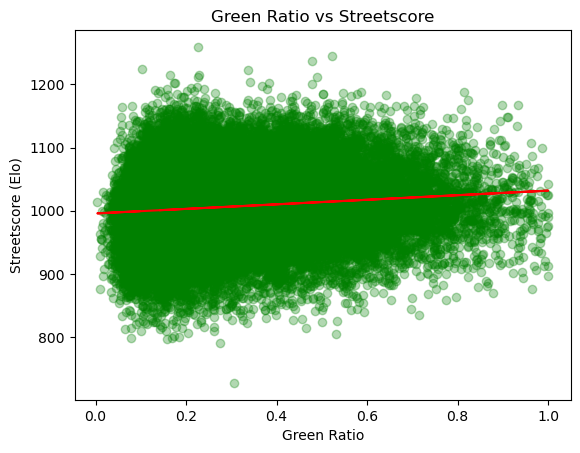

In [20]:
from sklearn.linear_model import LinearRegression

# X: 绿色比例；y: 安全评分
X = image_data_green[['green_ratio']]
y = image_data_green['elo_score_safety'] 

model = LinearRegression()
model.fit(X,y)

# 输出回归系数
print("截距:", model.intercept_)
print("绿色比例的回归系数:", model.coef_[0])
print("R²:", model.score(X, y))  # 判定系数（拟合优度）

import matplotlib.pyplot as plt

plt.scatter(image_data_green['green_ratio'], image_data_green['elo_score_safety'],color = 'green', alpha=0.3)
plt.plot(image_data_green['green_ratio'], model.predict(X), color='red')
plt.xlabel('Green Ratio')
plt.ylabel('Streetscore (Elo)')
plt.title('Green Ratio vs Streetscore')
plt.show()

In [21]:
def AddColorRatio(color,color_col,df):
    color_ratios = []
    for _, row in df.iterrows():
        colors = row['matched_colors']
        ratios = row['color_ratios_matched']

        if color in colors:
            color_index = colors.index(color)
            color_ratios.append(ratios[color_index])
        else:
            color_ratios.append(0.0)

    df[color_col] = color_ratios

In [22]:
AddColorRatio('red','red_ratio',image_data)
AddColorRatio('orange','orange_ratio',image_data)
AddColorRatio('yellow','yellow_ratio',image_data)
AddColorRatio('cyan','cyan_ratio',image_data)
AddColorRatio('blue','blue_ratio',image_data)
AddColorRatio('purple','purple_ratio',image_data)
AddColorRatio('black','black_ratio',image_data)
AddColorRatio('white','white_ratio',image_data)
AddColorRatio('gray','gray_ratio',image_data)

### 计算相关性

In [23]:
# 颜色的复杂度
image_data['color_number'] = image_data['matched_colors'].apply(len)

In [24]:
# len(list)

In [25]:
image_data['v_max'].unique()

array([255])

In [26]:
image_data.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'cluster_centers_rgb',
       'color_ratios_raw', 'cluster_centers_hsv', 'matched_colors_raw',
       'matched_colors', 'color_ratios_matched', 'filename', 'h_mean', 'h_std',
       's_mean', 'v_mean', 'v_max', 'place_id', 'simple_score_safety',
       'elo_score_safety', 'elo_score_lively', 'simple_score_lively',
       'green_ratio', 'red_ratio', 'orange_ratio', 'yellow_ratio',
       'cyan_ratio', 'blue_ratio', 'purple_ratio', 'black_ratio',
       'white_ratio', 'gray_ratio', 'color_number'],
      dtype='object')

In [27]:
correlation_data = image_data[['h_mean', 'h_std', 's_mean',
       'v_mean', 'elo_score_safety',
       'green_ratio', 'red_ratio', 'orange_ratio', 'yellow_ratio',
       'cyan_ratio', 'blue_ratio', 'purple_ratio', 'black_ratio',
       'white_ratio', 'gray_ratio','color_number']]

In [28]:
correlation_data.head()

,h_mean,h_std,s_mean,v_mean,elo_score_safety,green_ratio,red_ratio,orange_ratio,yellow_ratio,cyan_ratio,blue_ratio,purple_ratio,black_ratio,white_ratio,gray_ratio,color_number
0,59.777342,42.281507,43.972375,146.078017,968.956512,0.0,0.0,0.327358,0.137242,0.037942,0.0,0.0,0.0,0.000000,0.497458,4
1,44.728267,37.648842,62.034000,94.703683,996.751165,0.0,0.0,0.140300,0.686600,0.000000,0.0,0.0,0.0,0.000000,0.173100,3
2,52.645892,38.345215,70.778133,143.088600,1081.661041,0.0,0.0,0.000000,0.614258,0.244242,0.0,0.0,0.0,0.141500,0.000000,3
3,59.708800,44.573643,29.268692,136.006450,984.000000,0.0,0.0,0.000000,0.108533,0.000000,0.0,0.0,0.0,0.275108,0.616358,3
4,46.192183,39.487293,49.982667,126.712392,925.638091,0.0,0.0,0.000000,0.231792,0.000000,0.0,0.0,0.0,0.092800,0.675408,3


In [29]:
# 计算相关性系数
def calculate_correlation(df):
    # 保留数值型列进行相关系数计算
    numeric_df = df.select_dtypes(include='number')
    if numeric_df.shape[1] > 1:  # 确保至少有两个数值型列
        return numeric_df.corr().iloc[0, 1]  # 计算相关系数
    else:
        return None

# df.select_dtypes() 是 Pandas 中用来筛选列的函数，根据列的数据类型（dtype）来选出你需要的子集 DataFrame。
# df.select_dtypes(include=None, exclude=None)
# include：你想“保留”的数据类型（可以是一个字符串或类型的列表）
# exclude：你想“剔除”的数据类型
# 常见的数据类型：
# 'number'： 包括 int, float 等所有数值类型
# 'int'： 整数类型
# 'float'： 浮点数类型
# 'object'： 一般是字符串列
# 'bool'： 布尔类型（True/False）
# 'datetime' ： 时间类型
# numeric_df.shape ： （行数，列数)    

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 将 DataFrame 转换为长格式
correlation_long = correlation_data.melt(id_vars=['elo_score_safety'], var_name='Variable', value_name='Value')

# 检查是否存在非数值数据并进行转换
correlation_long['Value'] = pd.to_numeric(correlation_long['Value'], errors='coerce')

# 删除转换为 NaN 的行
correlation_long = correlation_long.dropna(subset=['Value'])

# 计算相关系数
correlation_cor = correlation_long.groupby('Variable').apply(calculate_correlation,include_groups = False).reset_index()
correlation_cor.columns = ['Variable', 'correlation']

# 打印结果
print(correlation_cor)


        Variable  correlation
0    black_ratio    -0.064934
1     blue_ratio     0.006615
2   color_number     0.061966
3     cyan_ratio    -0.040208
4     gray_ratio    -0.075411
5    green_ratio     0.139158
6         h_mean     0.086080
7          h_std     0.073275
8   orange_ratio    -0.080321
9   purple_ratio    -0.003889
10     red_ratio    -0.026474
11        s_mean     0.139830
12        v_mean    -0.056295
13   white_ratio     0.076050
14  yellow_ratio     0.064397


In [31]:
correlation_long

,elo_score_safety,Variable,Value
0,968.956512,h_mean,59.777342
1,996.751165,h_mean,44.728267
2,1081.661041,h_mean,52.645892
3,984.000000,h_mean,59.708800
4,925.638091,h_mean,46.192183
...,...,...,...
1659700,979.509205,color_number,3.000000
1659701,1065.925520,color_number,3.000000
1659702,1018.062462,color_number,5.000000
1659703,989.506792,color_number,4.000000


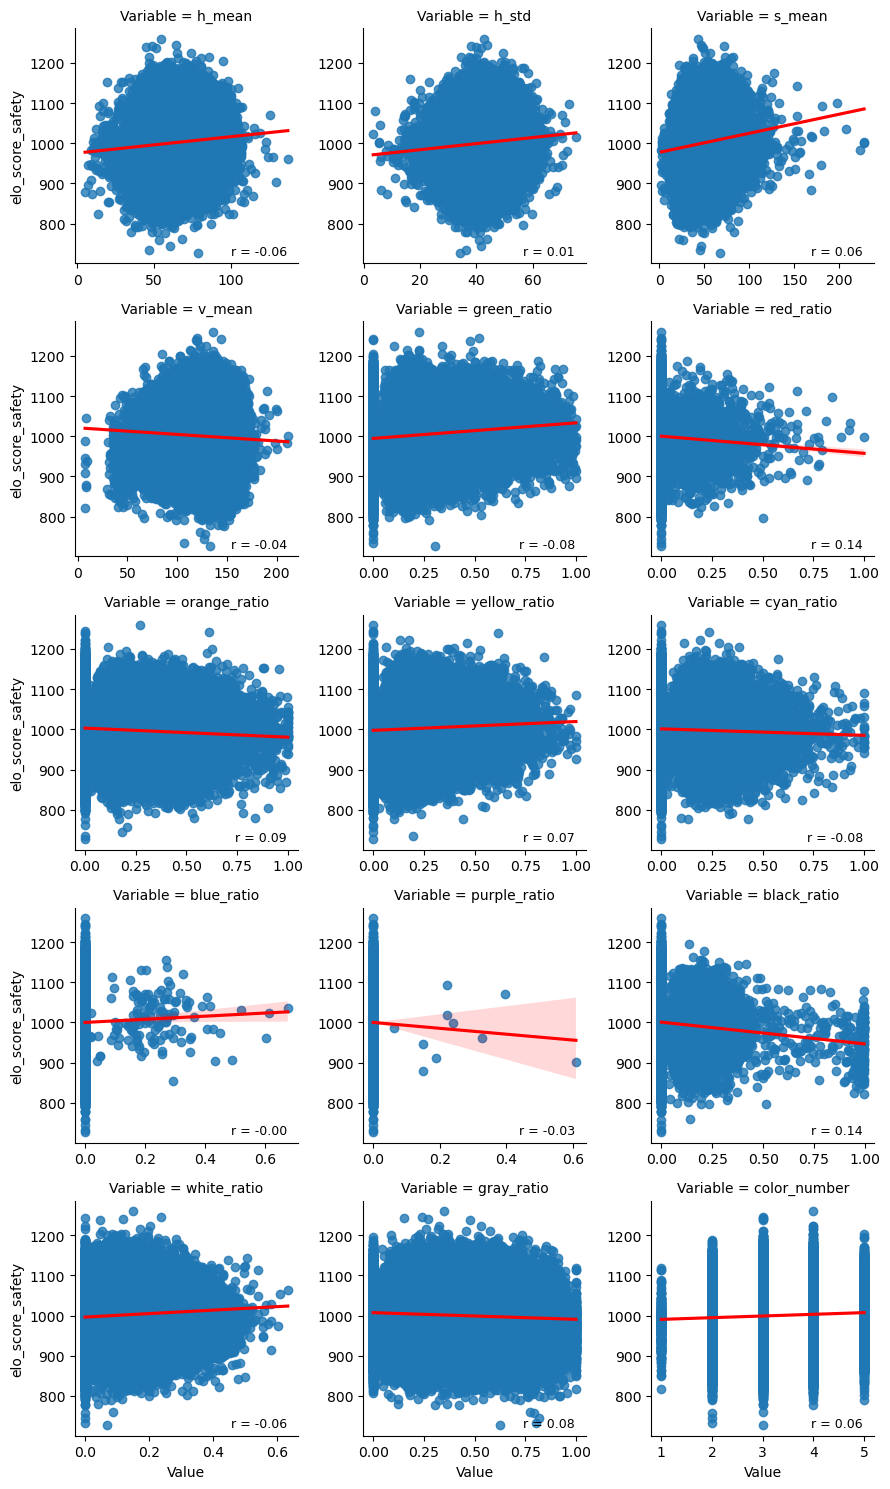

In [32]:
# 绘制相关性图
g = sns.FacetGrid(correlation_long, col="Variable", col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.regplot, x='Value', y='elo_score_safety', line_kws={"color": "red"})
# g.map_dataframe 通常与 seaborn 的 FacetGrid 一起使用，用于在网格的每个子图上应用一个函数
g.set_axis_labels("Value", "elo_score_safety")

# 注释：相关系数
for ax, label in zip(g.axes.flat, correlation_cor['correlation']):
    ax.text(0.95, 0.05, f'r = {label:.2f}', transform=ax.transAxes, ha='right', va='center', size=9)

plt.show()

可以看到现在有一些数据表现的不是很好,因为存在着共线性问题

### 计算共线性问题

对于共线性分析和ols分析,都需要add_constant,回归模型加不加对于预测值都没有影响

##### method 0

In [33]:
corr_matrix = correlation_data.corr().abs()
corr_matrix

,h_mean,h_std,s_mean,v_mean,elo_score_safety,green_ratio,red_ratio,orange_ratio,yellow_ratio,cyan_ratio,blue_ratio,purple_ratio,black_ratio,white_ratio,gray_ratio,color_number
h_mean,1.000000,0.279683,0.030195,0.041040,0.086080,0.231992,0.017898,0.380262,0.272764,0.154276,0.060572,0.035571,0.097881,0.206722,0.095445,0.013771
h_std,0.279683,1.000000,0.124868,0.067465,0.073275,0.131403,0.147665,0.027715,0.042424,0.073078,0.021541,0.001613,0.063570,0.074694,0.083138,0.016255
s_mean,0.030195,0.124868,1.000000,0.140798,0.139830,0.336752,0.044727,0.142397,0.248995,0.350353,0.031955,0.002412,0.141511,0.100917,0.662382,0.308711
v_mean,0.041040,0.067465,0.140798,1.000000,0.056295,0.384981,0.029498,0.220418,0.010300,0.301495,0.021444,0.011790,0.253150,0.110690,0.011543,0.110332
elo_score_safety,0.086080,0.073275,0.139830,0.056295,1.000000,0.139158,0.026474,0.080321,0.064397,0.040208,0.006615,0.003889,0.064934,0.076050,0.075411,0.061966
green_ratio,0.231992,0.131403,0.336752,0.384981,0.139158,1.000000,0.061486,0.412136,0.258648,0.180003,0.028331,0.001867,0.143130,0.068824,0.183412,0.024651
red_ratio,0.017898,0.147665,0.044727,0.029498,0.026474,0.061486,1.000000,0.010150,0.068598,0.016091,0.003666,0.023312,0.018254,0.011670,0.027689,0.047884
orange_ratio,0.380262,0.027715,0.142397,0.220418,0.080321,0.412136,0.010150,1.000000,0.136512,0.220090,0.018841,0.005946,0.067968,0.120587,0.424428,0.174612
yellow_ratio,0.272764,0.042424,0.248995,0.010300,0.064397,0.258648,0.068598,0.136512,1.000000,0.023411,0.013012,0.005132,0.128989,0.060116,0.254110,0.188721
cyan_ratio,0.154276,0.073078,0.350353,0.301495,0.040208,0.180003,0.016091,0.220090,0.023411,1.000000,0.008257,0.001064,0.029544,0.158612,0.492759,0.343465


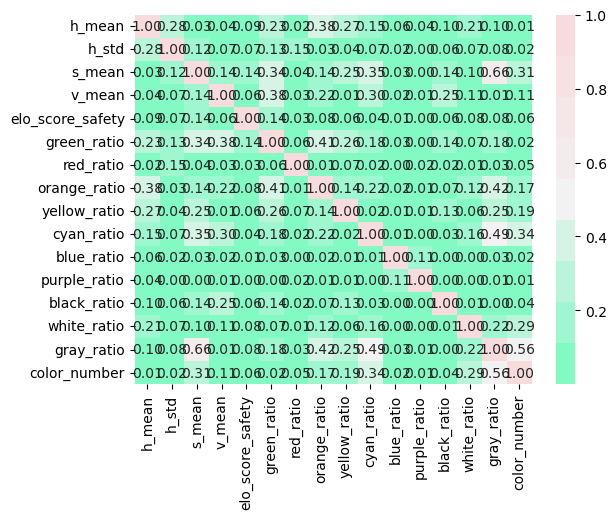

In [34]:
palette = sns.diverging_palette(150,10,s = 75,l = 90,sep = 10, n = 9)
sns.heatmap(corr_matrix,annot = True,fmt = '.2f',cmap = palette)
plt.show()

<Axes: >

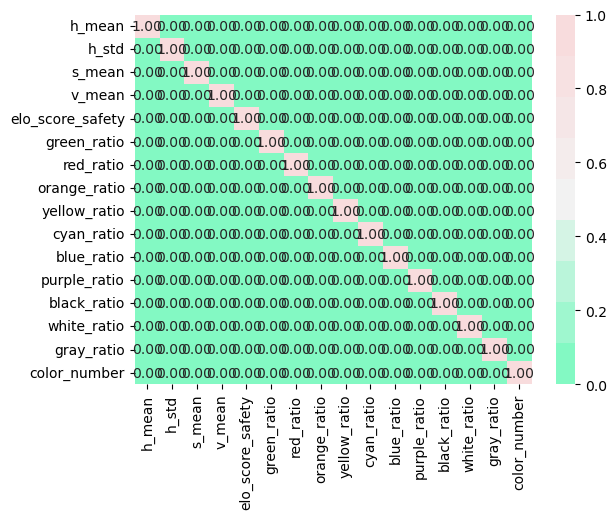

In [35]:
# 一般来说,相关性系数的绝对值大于0.8时会导致严重的共线性
sns.heatmap(corr_matrix>0.75,annot = True,fmt = '.2f',cmap = palette)

##### method 1

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 共线性
import statsmodels.api as sm

X = image_data[['green_ratio', 'gray_ratio', 'orange_ratio', 'black_ratio','s_mean', 'v_mean', 'color_number']]

# 添加常数项Intercept用于回归模型
X_with_const = sm.add_constant(X) 
# 回归模型需要包含一个 常数项（Intercept），否则你拟合的线性模型就会 强制通过原点 (0,0)，这在大多数实际场景中是不合理的
print(X_with_const.shape)

(110647, 8)


In [37]:
X_with_const

,const,green_ratio,gray_ratio,orange_ratio,black_ratio,s_mean,v_mean,color_number
0,1.0,0.000000,0.497458,0.327358,0.000000,43.972375,146.078017,4
1,1.0,0.000000,0.173100,0.140300,0.000000,62.034000,94.703683,3
2,1.0,0.000000,0.000000,0.000000,0.000000,70.778133,143.088600,3
3,1.0,0.000000,0.616358,0.000000,0.000000,29.268692,136.006450,3
4,1.0,0.000000,0.675408,0.000000,0.000000,49.982667,126.712392,3
...,...,...,...,...,...,...,...,...
110642,1.0,0.268900,0.336000,0.000000,0.000000,36.718183,136.999525,3
110643,1.0,0.000000,0.682083,0.000000,0.000000,33.078917,121.927267,3
110644,1.0,0.000000,0.124742,0.225533,0.231175,51.647583,138.845892,5
110645,1.0,0.187708,0.128825,0.000000,0.000000,41.010842,148.852933,4


In [38]:
X_with_const.shape # 行,列

(110647, 8)

In [39]:
# 计算每列的VIF
# Variance Inflation Factor（方差膨胀因子，VIF）: 衡量一个变量是否可以被其它变量线性预测（即变量之间是否有多重共线性）
vif_data = pd.DataFrame() # 创建一个df
vif_data['Variable'] = X_with_const.columns # 变量增加了一个常数项 - 截距
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values,i) for i in range(X_with_const.shape[1])]

# vif_data['VIF'] = []
# for i in range(X_with_const.shape[1]):
#     vif_data['VIF'].append(variance_inflation_factor(X_with_const.values,i))
    # 计算 X_with_const 中第 i 列自变量的 VIF 值
    # variance_inflation_factor 是 statsmodels.stats.outliers_influence 模块中的函数，用于计算单个自变量的方差膨胀因子
    # X_with_const.values 是将 X_with_const 转换为 numpy 数组，i 是当前列的索引
    

VIF ≈ 1 		没有多重共线性. 
1 < VIF < 5 	可以接受. 
VIF > 5 		存在较强的多重共线性，可能影响回归结果. 
VIF > 10 		严重共线性，建议处理（如去掉变量或降维）

In [40]:
vif_data

,Variable,VIF
0,const,197.942993
1,green_ratio,1.945812
2,gray_ratio,3.334445
3,orange_ratio,1.908869
4,black_ratio,1.252611
5,s_mean,2.068248
6,v_mean,1.383462
7,color_number,1.559159


#### LinearRegression

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = image_data[[
    'green_ratio', 'gray_ratio', 'orange_ratio', 'black_ratio',
    's_mean', 'v_mean', 'color_number'
]]
y = image_data['elo_score_safety']

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 拟合模型
model = LinearRegression().fit(X_train, y_train)

print("训练 R²:", model.score(X_train, y_train))
print("测试 R²:", model.score(X_test, y_test))

训练 R²: 0.03618741640697898
测试 R²: 0.03927025206455148


如果训练集r2比测试集高说明过拟合了

In [42]:
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:       elo_score_safety   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     604.7
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        11:18:27   Log-Likelihood:            -5.9390e+05
No. Observations:              110647   AIC:                         1.188e+06
Df Residuals:                  110639   BIC:                         1.188e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          982.9304      2.194    448.067   

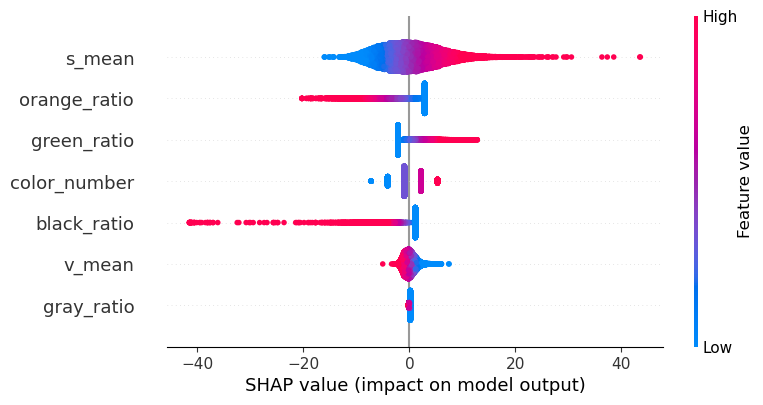

In [43]:
import shap

# 初始化SHAP解释器
explainer = shap.LinearExplainer(model,X_train)

#计算测试器shap值
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

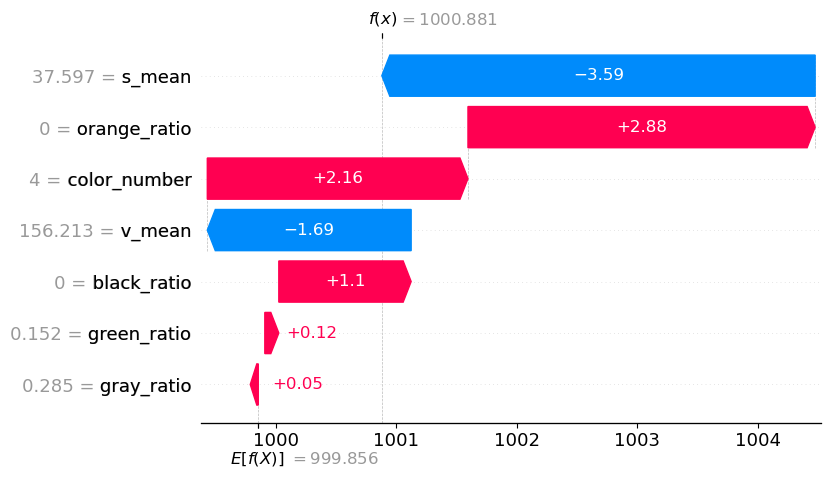

In [44]:
shap.plots.waterfall(shap_values[0])
# The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (22130, 8)) was passed

bar越长,影响越大

In [45]:
shap_values

.values =
array([[ 0.11607338,  0.05417186,  2.87808277, ..., -3.59216959,
        -1.69002127,  2.16094162],
       [-2.1606131 , -0.10002227,  2.87808277, ...,  0.74981891,
         1.25894463, -0.97085783],
       [-2.1606131 , -0.08918571,  2.87808277, ..., -4.40422521,
         0.27366989, -0.97085783],
       ...,
       [-2.1606131 ,  0.0220208 ,  2.87808277, ...,  1.17683782,
        -0.56484492,  2.16094162],
       [ 1.71954745,  0.1029473 ,  2.87808277, ...,  5.26984535,
         0.15088789,  2.16094162],
       [-2.1606131 ,  0.10988894, -6.88258902, ...,  1.36852668,
        -0.03127867,  2.16094162]])

.base_values =
array([999.85636555, 999.85636555, 999.85636555, ..., 999.85636555,
       999.85636555, 999.85636555])

.data =
array([[1.52266667e-01, 2.84525000e-01, 0.00000000e+00, ...,
        3.75965750e+01, 1.56213242e+02, 4.00000000e+00],
       [0.00000000e+00, 6.96575000e-01, 0.00000000e+00, ...,
        4.97231000e+01, 1.08427825e+02, 3.00000000e+00],
       [0.00

In [46]:
shap_values.values

array([[ 0.11607338,  0.05417186,  2.87808277, ..., -3.59216959,
        -1.69002127,  2.16094162],
       [-2.1606131 , -0.10002227,  2.87808277, ...,  0.74981891,
         1.25894463, -0.97085783],
       [-2.1606131 , -0.08918571,  2.87808277, ..., -4.40422521,
         0.27366989, -0.97085783],
       ...,
       [-2.1606131 ,  0.0220208 ,  2.87808277, ...,  1.17683782,
        -0.56484492,  2.16094162],
       [ 1.71954745,  0.1029473 ,  2.87808277, ...,  5.26984535,
         0.15088789,  2.16094162],
       [-2.1606131 ,  0.10988894, -6.88258902, ...,  1.36852668,
        -0.03127867,  2.16094162]])

In [47]:
#计算每个特征的平均绝对shap值(代表重要性)
shap_value_abs_mean = pd.DataFrame({
    'Feature':X.columns,
    'Mean_SHAP_Abs':np.abs(shap_values.values).mean(axis = 0)
})
# shap_values是 SHAP 库计算得到的 SHAP 值对象，shap_values.values提取出其中的 SHAP 值数组
# .mean(axis = 0)：对取绝对值后的 SHAP 值数组按列求平均值。axis = 0表示按列计算，最终得到每个特征对应的平均绝对 SHAP 值

In [48]:
shap_value_abs_mean

,Feature,Mean_SHAP_Abs
0,green_ratio,2.300398
1,gray_ratio,0.074638
2,orange_ratio,3.586881
3,black_ratio,1.516931
4,s_mean,4.454184
5,v_mean,0.861158
6,color_number,2.058109


In [49]:
# 按影响力排序
shap_value_abs_mean = shap_value_abs_mean.sort_values(by = 'Mean_SHAP_Abs',ascending = False).reset_index(drop = True)
# reset_index(drop = True)用于重置DataFrame的索引，将其转换为标准的整数索引，并丢弃原有的索引
shap_value_abs_mean

,Feature,Mean_SHAP_Abs
0,s_mean,4.454184
1,orange_ratio,3.586881
2,green_ratio,2.300398
3,color_number,2.058109
4,black_ratio,1.516931
5,v_mean,0.861158
6,gray_ratio,0.074638


所以对安全系数影响力最大的系数依次是:s_mean>orange_ratio>green_ratio>color_number>black_ratio>v_mean>gray_ratio	

#### 随机森林

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

X = image_data[[
    'green_ratio', 'gray_ratio', 'orange_ratio', 'black_ratio',
    's_mean', 'v_mean', 
]]
y = image_data['elo_score_safety']

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("训练 R²:", rf_model.score(X_train, y_train))
print("测试 R²:", r2)
# n_estimators：表示弱学习器的最大迭代次数，或者说最大的弱学习器的个数，默认是 10。一般来说，n_estimators 太小，容易欠拟合；n_estimators 太大，又容易过拟合，这里设置为 100 是一个适中的数值 2。
# max_depth：树的最大深度。如果设置为 None，则树的节点会一直扩展直到所有叶子都是纯的，或者所有叶子节点中包含的样本数小于 min_samples_split 参数的值。这里设置为 3，意味着树最多扩展到 3 层。
# random_state：如果是 int，则 random_state 是随机数生成器使用的种子。通过设置相同的 random_state，可以保证每次运行代码时得到相同的随机结果，这里设置为 42 2。
# n_jobs：指定并行运行的作业数。默认值为 None，-1 表示使用所有处理器

训练 R²: 0.037682971616971095
测试 R²: 0.03901832170154229


100%|===================| 22077/22130 [00:22<00:00]        

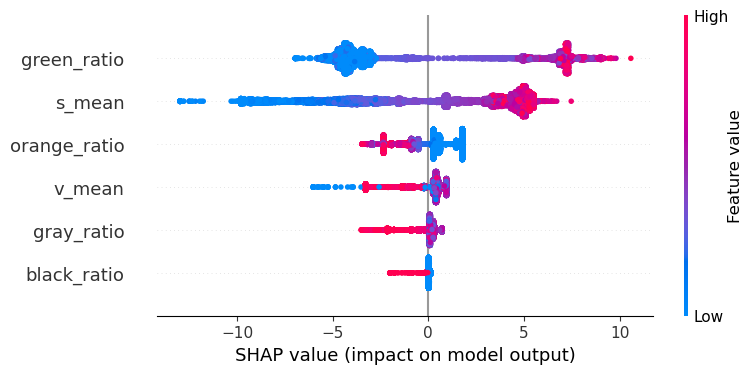

In [51]:
# 创建TreeExplainer
explainer = shap.Explainer(rf_model,X_train)

#计算测试器shap值
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

#### GridSearchCv

In [52]:
rf = RandomForestRegressor(random_state=42)
# 定义参数网格
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# 网格搜索
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

print("最佳参数组合:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_

# 预测
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

print("训练 R²:", r2_score(y_train, y_train_pred))
print("测试 R²:", r2_score(y_test, y_test_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/opt/anaconda3/lib/python3.13/site-packages/sklearn/base.py", line 436, in _validate_para

最佳参数组合: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
训练 R²: 0.08971268267391819
测试 R²: 0.05028868682749865


 97%|=================== | 21520/22130 [00:21<00:00]       

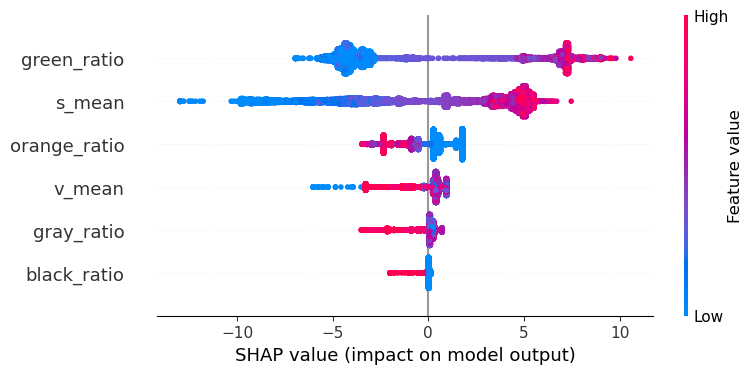

In [54]:
# 创建TreeExplainer
explainer = shap.Explainer(rf_model,X_train)

#计算测试器shap值
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)

#### XGBoost

In [57]:
from xgboost import XGBRegressor

# 基础模型
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
# objective='reg:squarederror' 是指定 XGBoost 回归模型的目标函数，这里使用的是均方误差损失函数（Mean Squared Error, MSE）

# 参数网格
param_grid = {
    'n_estimators':[100,200],
    'max_depth':[3,5,7],
    'learning_rate':[0.01,0.1,0.3],
    'subsample':[0.8,1],
    'colsample_bytree':[0.8,1]
}

# 网格搜索
grid_search = GridSearchCV(
    estimator = xgb,
    param_grid = param_grid,
    scoring = 'r2',
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train,y_train)

print("最佳参数组合:", grid_search.best_params_)

best_model = grid_search.best_estimator_

# 预测并评估
y_train_pred = best_model.predict(X_train)
y_test_prd = best_model.predict(X_test)

print("训练 R²:", r2_score(y_train, y_train_pred))
print("测试 R²:", r2_score(y_test, y_test_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
最佳参数组合: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
训练 R²: 0.05437471963217
测试 R²: 0.05028868682749865


Exception ignored in: <function ResourceTracker.__del__ at 0x10254dd00>
 54%|===========         | 11904/22130 [00:19<00:16]       Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x103181d00>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTrack

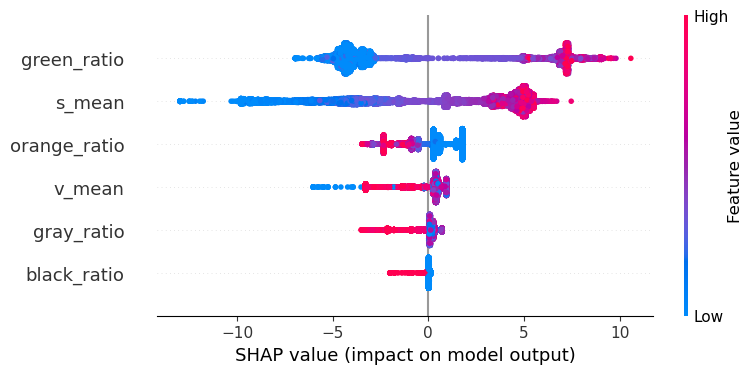

In [58]:
# 创建TreeExplainer
explainer = shap.Explainer(rf_model,X_train)

#计算测试器shap值
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values)